Processing unknown faces...
Filename 2023-03-15-07-37-22.png, found 1 face(s).
 - N180825 from [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, False, False, False, False, True, False, False, False]


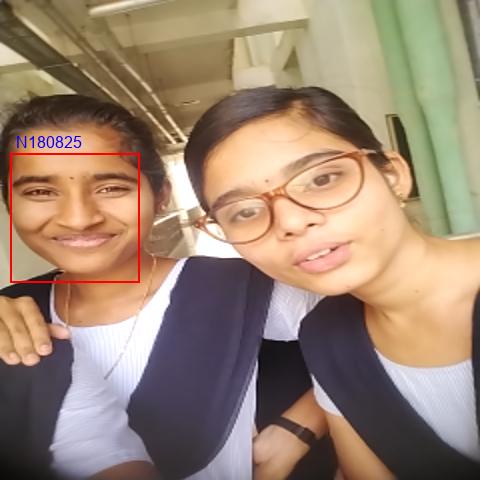

Filename 2023-03-15-07-38-01.png, found 2 face(s).
 - N180789 from [True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, True]
 - N180789 from [True, True, False, False, True, True, True, True, True, True, True, False, False, True, True, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False]


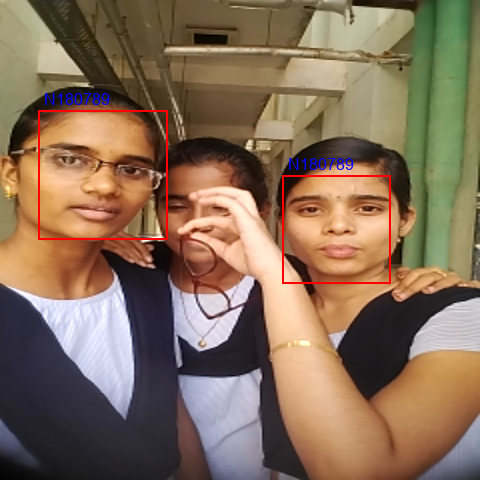

Filename WhatsApp Image 2023-04-16 at 11.54.19.jpeg, found 3 face(s).
 - N180789 from [False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
 - N180825 from [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, False, False, False, False, True, False, False, False]
 - N180924 from [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False]


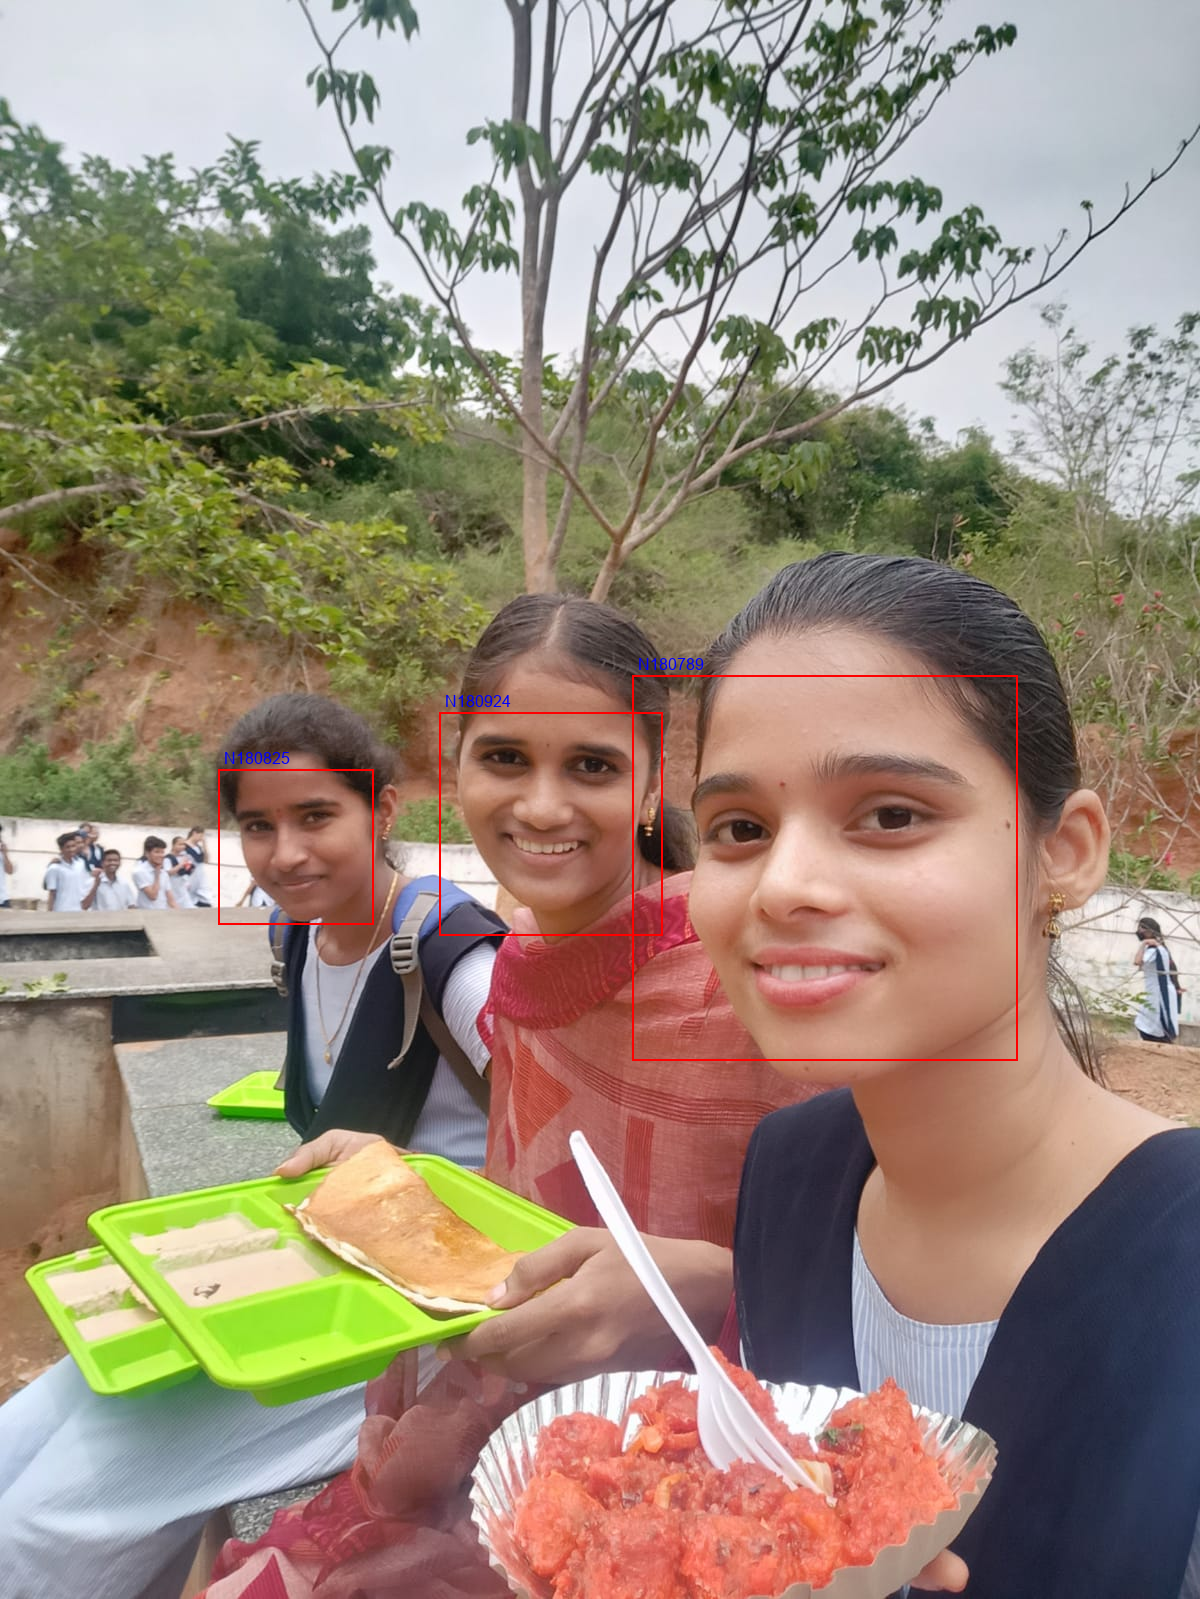

In [1]:
import face_recognition
import os
import PIL.Image
import numpy as np
import pickle

from PIL import ImageDraw, ImageFont
FONT = ImageFont.truetype('arial.ttf', 16)
UNKNOWN_FACES_DIR = 'identify'
TOLERANCE = 0.5
print('Processing unknown faces...')
with open("face_recognition_model.pkl", "rb") as f:
    model_data = pickle.load(f)

known_faces = model_data["known_faces"]
known_names = model_data["known_names"]
MODEL = model_data["MODEL"]
for filename in os.listdir(UNKNOWN_FACES_DIR):
    if os.path.isdir(os.path.join(UNKNOWN_FACES_DIR, filename)):
        continue

    print(f'Filename {filename}', end='')
    image = face_recognition.load_image_file(os.path.join(UNKNOWN_FACES_DIR, filename))

    # Scale down image if it's giant so things run a little faster
    if max(image.shape) > 1600:
        pil_img = PIL.Image.fromarray(image)
        pil_img.thumbnail((1600, 1600), PIL.Image.LANCZOS)
        image = np.array(pil_img)
    # drawing image
    pil_image = PIL.Image.fromarray(image)
    draw = ImageDraw.Draw(pil_image)
    locations = face_recognition.face_locations(image, model=MODEL)
    encodings = face_recognition.face_encodings(image, locations)

    print(f', found {len(encodings)} face(s).')

    for face_encoding, face_location in zip(encodings, locations):
        results = face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE)
        top, right, bottom, left = face_location
        draw.rectangle(((left, top), (right, bottom)), outline='red', width=2)
        match = None
        matches = [known_names[i] for i, result in enumerate(results) if result]
        if matches:
            uniq=list(set(matches))
            co=[matches.count(uniq[i]) for i in range(len(uniq))]
            match=uniq[(co.index(max(co)))]
            draw.text((left+6, top-20), match, font=FONT, fill='blue')
            print(f' - {match} from {results}')
        else:
            print(' - Unknown person from', results)

    del draw
    display(pil_image)


In [59]:
pil_image.save("test.jpg")



In [53]:
uniq[(co.index(max(co)))]
# co.index(max(co))

'N180789'

In [ ]:
import os
import PIL.Image
import numpy as np
import pickle
import face_recognition
from PIL import ImageDraw, ImageFont

UNKNOWN_FACES_DIR = 'identify'
TOLERANCE = 0.6
FONT = ImageFont.truetype('arial.ttf', 16)

print('Processing unknown faces...')
with open("face_recognition_model.pkl", "rb") as f:
    model_data = pickle.load(f)

known_faces = model_data["known_faces"]
known_names = model_data["known_names"]
MODEL = model_data["MODEL"]

for filename in os.listdir(UNKNOWN_FACES_DIR):
    if os.path.isdir(os.path.join(UNKNOWN_FACES_DIR, filename)):
        continue

    print(f'Filename {filename}', end='')
    image = face_recognition.load_image_file(os.path.join(UNKNOWN_FACES_DIR, filename))

    # Scale down image if it's giant so things run a little faster
    if max(image.shape) > 1600:
        pil_img = PIL.Image.fromarray(image)
        pil_img.thumbnail((1600, 1600), PIL.Image.LANCZOS)
        image = np.array(pil_img)

    locations = face_recognition.face_locations(image, model=MODEL)
    encodings = face_recognition.face_encodings(image, locations)

    print(f', found {len(encodings)} face(s).')

    # Draw rectangles and labels for all detected faces
    pil_image = PIL.Image.fromarray(image)
    draw = ImageDraw.Draw(pil_image)
   
    for face_encoding, face_location in zip(encodings, locations):
        top, right, bottom, left = face_location
        draw.rectangle(((left, top), (right, bottom)), outline='red', width=2)
        results = face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE)
        match = None
        if True in results:
            match = known_names[results.index(True)]
            draw.text((left+6, top-20), match, font=FONT, fill='blue')
            print(f' - {match} from {results}')
            
        else:
            draw.text((left+6, top-20), 'Unknown', font=FONT, fill='blue')
            print(' - Unknown person from', results)
    del draw

    # Display the annotated image
    # pil_image.show()
    
   
    
    display(pil_image)



In [12]:
match